In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading the csv file

In [2]:
sal=pd.read_csv("Salaries.csv")

### Checking the head of the DataFrame.**

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Checking how many NaN values are there in the dataframe

In [4]:
sal.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

### Droping the Column which are not needed for our Analysis

In [5]:
sal.drop(['Benefits','Notes','Status'],axis=1,inplace=True)

In [6]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco


In [7]:
sal.isna().sum()

Id                    0
EmployeeName          0
JobTitle              0
BasePay             609
OvertimePay           4
OtherPay              4
TotalPay              0
TotalPayBenefits      0
Year                  0
Agency                0
dtype: int64

### Filling the NaN in the BasePay Column

In [8]:
bmean=sal['BasePay'].mean()
sal.fillna(bmean,inplace=True)

In [9]:
sal.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

### Checking the info of the dataset

In [10]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Agency            148654 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 11.3+ MB


### making the experience Column which not there in our dataset

In [11]:
def exp(Year):
    if Year==2014:
        return 1
    elif Year==2013:
        return 2
    elif Year==2012:
        return 3
    elif Year==2011:
        return 4
    

### Applying the exp function in our dataset

In [12]:
sal['Exp']=sal.Year.apply(exp)

In [13]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency,Exp
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco,4
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco,4
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco,4
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco,4
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco,4


**What is the average BasePay ?**

In [14]:
means = sal.BasePay.mean()
print(means)

66325.44884050524


**What is the highest amount of OvertimePay in the dataset ?**

In [15]:
sal["OvertimePay"].max()

245131.88

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [16]:
sal[sal["EmployeeName"]=="JOSEPH DRISCOLL"]["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

-> I've used masking in filtering technique and i got that Joseph Driscoll work as a Captain in Fire Surppression

**How much does JOSEPH DRISCOLL make (including benefits)?**

In [17]:
sal[sal["EmployeeName"]=="JOSEPH DRISCOLL"]["TotalPayBenefits"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

-> Joseph Driscoll makes 270324.91 including benefits

**What is the name of highest paid person (including benefits)?**

In [18]:
maximum=sal["TotalPayBenefits"].max()
sal[sal["TotalPayBenefits"]==maximum]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency,Exp
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011,San Francisco,4


### OR

In [19]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency,Exp
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011,San Francisco,4


->  NATHANIEL FORD is the highest paid person and works as a General Manager in Metropolitan Transit Autority

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [20]:
minimum=sal["TotalPayBenefits"].min()
sal[sal["TotalPayBenefits"]==minimum]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency,Exp
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,-618.13,-618.13,2014,San Francisco,1


### OR

In [21]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency,Exp
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,-618.13,-618.13,2014,San Francisco,1


-> Joe Lopez is the lowest paid person and he works as Councelor in Log Cabin Ranch


-> and also we can notice  that she is been payed  in -ve and we can understand that she may have taken some finance or loan from the company

**What was the average (mean) BasePay**


In [22]:
sal.groupby("Year")["BasePay"].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69576.866579
2014    66564.396851
Name: BasePay, dtype: float64

<AxesSubplot:xlabel='Year'>

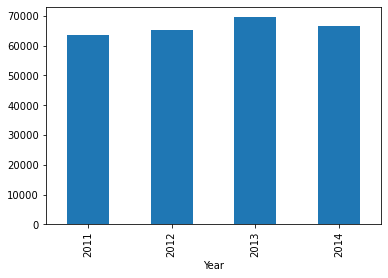

In [23]:
sal.groupby("Year")["BasePay"].mean().plot(kind='bar')

->  we can understand that average basepay is range from 63000 to 67000,from the year from 2011 to 2014

**How many unique job titles are there?**

In [24]:
sal.JobTitle.nunique()

2159

->  There are 2159 unique jobs in our dataset

**What are the top 5 most common jobs?**

In [25]:
jobss=sal["JobTitle"].value_counts()
jobss.head(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

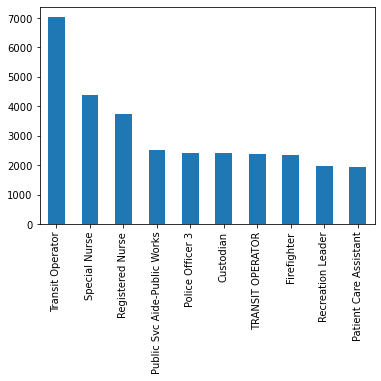

In [26]:
jobss=sal["JobTitle"].value_counts().nlargest(10).plot(kind='bar')

->  These are Top 10 jobs in our dataset


->  From insight we can understand that Transit Operator has highest number of Job posts

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [27]:
sum(sal[sal["Year"]==2013]["JobTitle"].value_counts()==1)

202

->  There are 202 job titles which are represented by only one person in the year of 2013

**How many people have the word Chief
in their job title? (This is pretty tricky)**

In [28]:
sal.JobTitle

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: object

In [29]:
def chief_word(JobTitle):
    if ('chief' in JobTitle.lower().split()):
        return True
    else:
        return False

In [30]:
sal.JobTitle.apply(chief_word)

0         False
1         False
2         False
3         False
4          True
          ...  
148649    False
148650    False
148651    False
148652    False
148653    False
Name: JobTitle, Length: 148654, dtype: bool

In [31]:
sum(sal["JobTitle"].apply(chief_word))

477

In [32]:
sal[sal["JobTitle"].apply(chief_word)].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency,Exp
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco,4
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,316285.74,316285.74,2011,San Francisco,4
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,302377.73,302377.73,2011,San Francisco,4
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,299494.17,299494.17,2011,San Francisco,4
25,26,GREGORY SUHR,CHIEF OF POLICE,256470.41,0.00,11522.18,267992.59,267992.59,2011,San Francisco,4


-> These are the top 5 person are Chief or Deputy chief in their particular department

###  Which person gets highest basepay and contains chief in their jobtitle

In [33]:
sal[sal["JobTitle"].apply(chief_word)].max()

Id                                        140157
EmployeeName                       Yvonne R Mere
JobTitle            Emergency Medical Svcs Chief
BasePay                                319275.01
OvertimePay                             71344.88
OtherPay                               342802.63
TotalPay                               471952.64
TotalPayBenefits                       510732.68
Year                                        2014
Agency                             San Francisco
Exp                                            4
dtype: object

->  Employee name is Yvonne R Mere and he gets 319275.01,is the highest basepay

**Bonus: Is there a correlation between length of the Job Title string and Salary?**

In [34]:
sal["JobLen"]=sal.JobTitle.apply(len)

In [35]:
sal[["JobLen","TotalPayBenefits"]].corr()

,JobLen,TotalPayBenefits
JobLen,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


Note-:The correlation between them is -ve and almost zero

### What are the totalpaybenefits w.r.t year ?

In [36]:
sal.groupby('TotalPayBenefits')['Year'].value_counts().nlargest(10)

TotalPayBenefits  Year
7959.18           2013    263
123290.70         2011     56
132242.50         2011     49
26058.70          2014     43
105489.00         2011     42
2645.45           2014     37
25659.10          2013     36
69237.18          2013     36
33739.71          2014     34
64625.68          2014     34
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

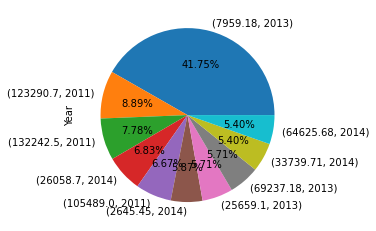

In [37]:
sal.groupby('TotalPayBenefits')['Year'].value_counts().nlargest(10).plot(kind='pie',autopct=("%1.2f%%"))

-> These are the top 10 TotalPayBenefits w.r.t year
which means whose joined in 2014 it means he has 1 year experience,whose joined in the year is 2013 then he as 2 year exp and so on
from the visualization we get that there are more number of people who joined in 2013 from top 10 data

### What are the totalpaybenefits w.r.t Exp ?

In [38]:
sal.groupby('TotalPayBenefits')['Exp'].value_counts().nlargest(10)

TotalPayBenefits  Exp
7959.18           2      263
123290.70         4       56
132242.50         4       49
26058.70          1       43
105489.00         4       42
2645.45           1       37
25659.10          2       36
69237.18          2       36
33739.71          1       34
64625.68          1       34
Name: Exp, dtype: int64

<AxesSubplot:ylabel='Exp'>

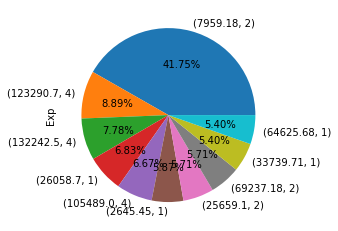

In [39]:
sal.groupby('TotalPayBenefits')['Exp'].value_counts().nlargest(10).plot(kind='pie',autopct=("%1.2f%%"))

-> There are more number of people who has 2 year experience,from To 10 data

### What are jobtitle with respect to totalpaybenefits ?

In [40]:
sal.groupby('JobTitle')['TotalPayBenefits'].value_counts().nlargest(15)

JobTitle                          TotalPayBenefits
Commissioner 16.700c, No Pay      7959.18             49
MANAGER III                       123290.70           45
Police Officer                    26058.70            43
MANAGER IV                        132242.50           41
PRINCIPAL ADMINISTRATIVE ANALYST  105489.00           41
Transit Operator                  2645.45             37
Police Officer                    25659.10            36
                                  69237.18            36
Firefighter                       33739.71            34
Police Officer                    64625.68            34
Hospital Eligibility Worker       2610.54             30
Transit Operator                  7959.18             26
SENIOR CLERK TYPIST               53539.40            20
TRANSIT OPERATOR                  2529.28             20
ATTORNEY (CIVIL/CRIMINAL)         164352.66           19
Name: TotalPayBenefits, dtype: int64

<AxesSubplot:ylabel='JobTitle,TotalPayBenefits'>

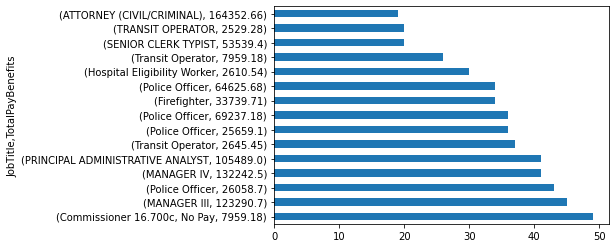

In [41]:
sal.groupby('JobTitle')['TotalPayBenefits'].value_counts().nlargest(15).plot(kind='barh')

### These is the totalpaybenefits w.r.t experience

In [42]:
sal.groupby('TotalPayBenefits')['Exp'].value_counts().nlargest(15)

TotalPayBenefits  Exp
7959.18           2      263
123290.70         4       56
132242.50         4       49
26058.70          1       43
105489.00         4       42
2645.45           1       37
25659.10          2       36
69237.18          2       36
33739.71          1       34
64625.68          1       34
2610.54           1       30
92865.72          2       28
0.00              1       27
53539.40          4       24
57630.60          4       23
Name: Exp, dtype: int64

<AxesSubplot:ylabel='TotalPayBenefits,Exp'>

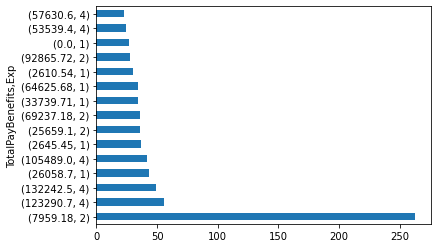

In [43]:
sal.groupby('TotalPayBenefits')['Exp'].value_counts().nlargest(15).plot(kind='barh')

<AxesSubplot:>

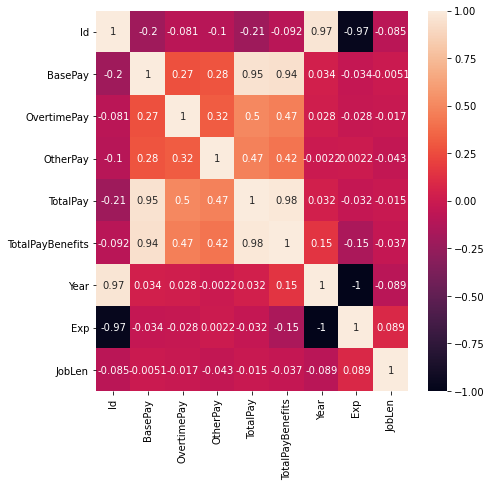

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(sal.corr(),annot=True)

### CONCLUSION

->The Correlation between Basepay,Totalpay and TotalPayBenefits because Basepay is the part of Totalpay and Totalpay is the part of Totalpaybenefits


->In actual Exp and Totalpaybenefits have high correlation i.e if experience is more than Totalpaybenefits will be more but this is the fake data so that the correlation is is -ve or almost zero which means as Experience increases totalpaybenefits decreases or viz

->The Avearge Basepay of the Employee gets from the institue or company provides range from is 63000 to 67000,from the year from 2011 to 2014

->Maximum Overtimepay is 245131.88

->NATHANIEL FORD is the highest paid person and works as a General Manager in Metropolitan Transit Autority.

->Joe Lopez is the lowest paid person and he works as Councelor in Log Cabin Ranch 

->There are 2159 unique jobs in our dataset and Transit Operator has highest number of Job posts

->477 people have chief in their Jobtitle,Employee name is Yvonne R Mere and he gets 319275.01,is the highest basepay who contains chief in the jobtitle




### RESULT

From the conclusion i suggest the jobseekers that they must be well educated and eligible to apply in high responsible post such general manager,chief etc in their relevant department so they can get high pay benefits.


There are 2159 unique jobs when department opens a vaccancy there must be a chance that atleast 2159 can get the job.

If they get placed in the relevant department i suggest the emplooyer do not take any loan from their department as my analysis i can see that they are deducting whole salary in some cases that means dept/institute do not have any rules and regulation for recovery in that situation employeer can be in trouble or else try to request that they must come up with the proper rules and regulation for recovery.